# ***Exploratory Data Analysis (EDA):***

# Load the historic and prediction input datasets.

In [30]:
import pandas as pd
import os

class DataLoader:
    def __init__(self, historic_file, prediction_file):
        self.historic_file = historic_file
        self.prediction_file = prediction_file

    def load_data(self):
        if not os.path.isfile(self.historic_file) or not os.path.isfile(self.prediction_file):
            print("One or both file paths are invalid.")
            return None, None
        try:
            historic_data = pd.read_csv(self.historic_file)
            prediction_data = pd.read_csv(self.prediction_file)
            return historic_data, prediction_data
        except Exception as e:
            print("An error occurred while loading data:", e)
            return None, None

# Example usage:
historic_file_path = "/content/historic.csv"
prediction_file_path = "/content/prediction_input.csv"

data_loader = DataLoader(historic_file_path, prediction_file_path)
historic_data, prediction_data = data_loader.load_data()

if historic_data is not None and prediction_data is not None:
    print("Historic data loaded successfully. Shape:", historic_data.shape)
    print("Prediction data loaded successfully. Shape:", prediction_data.shape)
else:
    print("Failed to load data. Please check file paths.")


Historic data loaded successfully. Shape: (8000, 6)
Prediction data loaded successfully. Shape: (2000, 5)


# **Data Exploration:**

**Explore basic statistics of the datasets (mean, median, min, max, etc.).**

In [31]:
class DataExploration:
    def __init__(self, historic_data, prediction_data):
        self.historic_data = historic_data
        self.prediction_data = prediction_data

    def explore_statistics(self):
        # Basic statistics for historic data
        historic_stats = self.historic_data.describe()

        # Basic statistics for prediction data
        prediction_stats = self.prediction_data.describe()

        return historic_stats, prediction_stats

# Example usage:
explorer = DataExploration(historic_data, prediction_data)
historic_stats, prediction_stats = explorer.explore_statistics()

print("Basic Statistics for Historic Data:")
print(historic_stats)

print("\nBasic Statistics for Prediction Data:")
print(prediction_stats)


Basic Statistics for Historic Data:
             item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000

Basic Statistics for Prediction Data:
             item_no        stars
count    2000.000000  2000.000000
mean   541828.098000     3.476750
std    260971.444809     0.989345
min    100023.000000     0.700000
25%    308356.750000     2.800000
50%    541076.000000     3.500000
75%    773277.250000     4.200000
max    989050.000000     5.800000


# **What we Understood: **

We develop a class called DataExploration that is in charge of investigating the datasets' fundamental statistics.


    The class is initialized with historical and predictive data using the __init__ function.
    The describe() function in pandas is used by the explore_statistics method to generate basic statistics (mean, median, min, max, etc.) for both historic and prediction data.
    The fundamental statistics for both datasets are then printed out.

# **Visualize distributions of numeric features (e.g., stars) and categorical features (e.g., category, color). for Historical dataset**

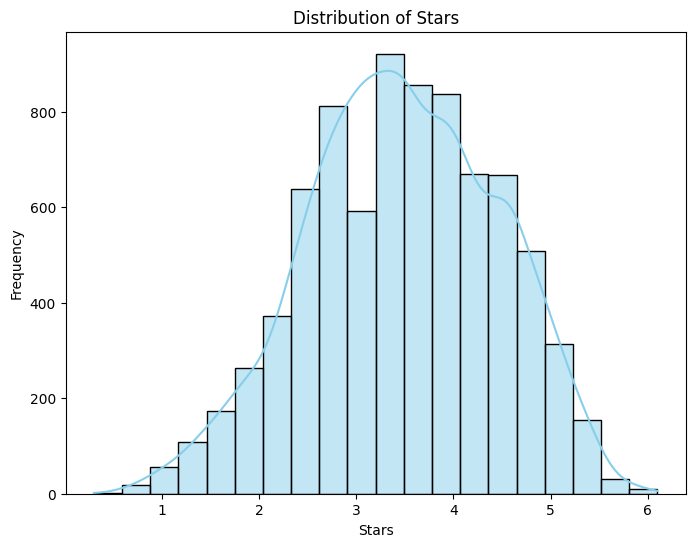

<ipython-input-32-810bc64f0441>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=self.historic_data, palette='pastel')


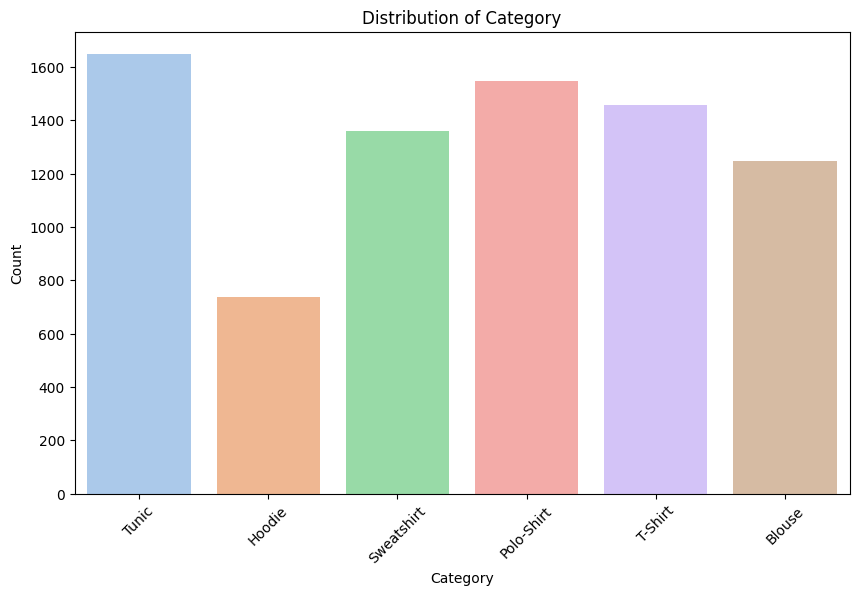

<ipython-input-32-810bc64f0441>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=self.historic_data, palette='pastel')


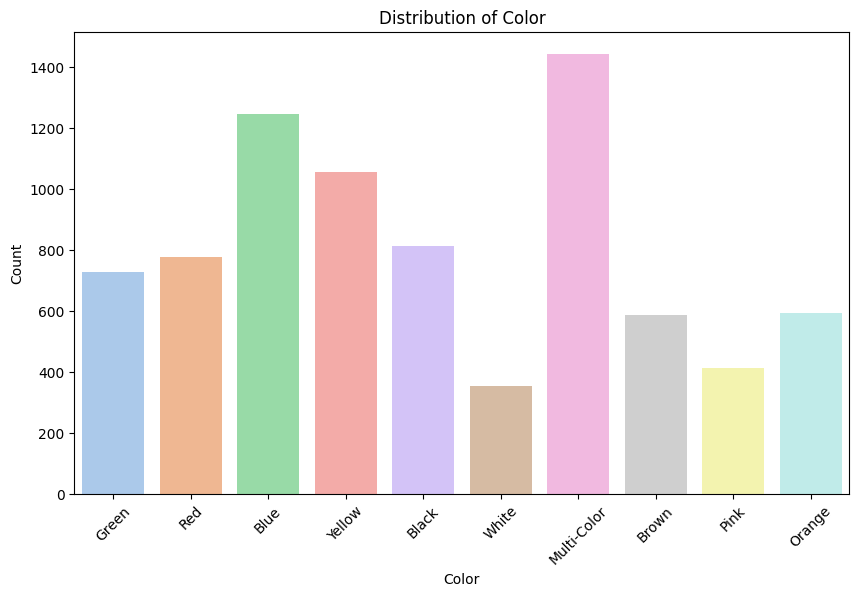

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

class DataVisualization:
    def __init__(self, historic_data):
        self.historic_data = historic_data

    def visualize_distributions(self):
        # Visualize distributions of numeric features (stars)
        plt.figure(figsize=(8, 6))
        sns.histplot(self.historic_data['stars'], bins=20, kde=True, color='skyblue')
        plt.title('Distribution of Stars')
        plt.xlabel('Stars')
        plt.ylabel('Frequency')
        plt.show()

        # Visualize distributions of categorical features (category, color)
        categorical_features = ['category', 'color']
        for feature in categorical_features:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=feature, data=self.historic_data, palette='pastel')
            plt.title(f'Distribution of {feature.capitalize()}')
            plt.xlabel(f'{feature.capitalize()}')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

# Example usage:
visualizer = DataVisualization(historic_data)
visualizer.visualize_distributions()


# **What we understood : **


To visualize the dataset's numeric and categorical feature distributions, we develop a DataVisualization class.


    The class is initialized with historical data using the __init__ method.
    The visualize_distributions method generates count plots for categorical features (category, color) and histograms for numeric characteristics (stars) using Matplotlib and Seaborn.
    In order to display the distributions, we finally invoke the visualize_distributions method.

The distributions of the dataset's numerical and categorical attributes are shown in a basic manner by this code. By changing elements like the plot size, color scheme, and bin size to suit your tastes, you can further alter the plots.

# **More types of DataVisualization **

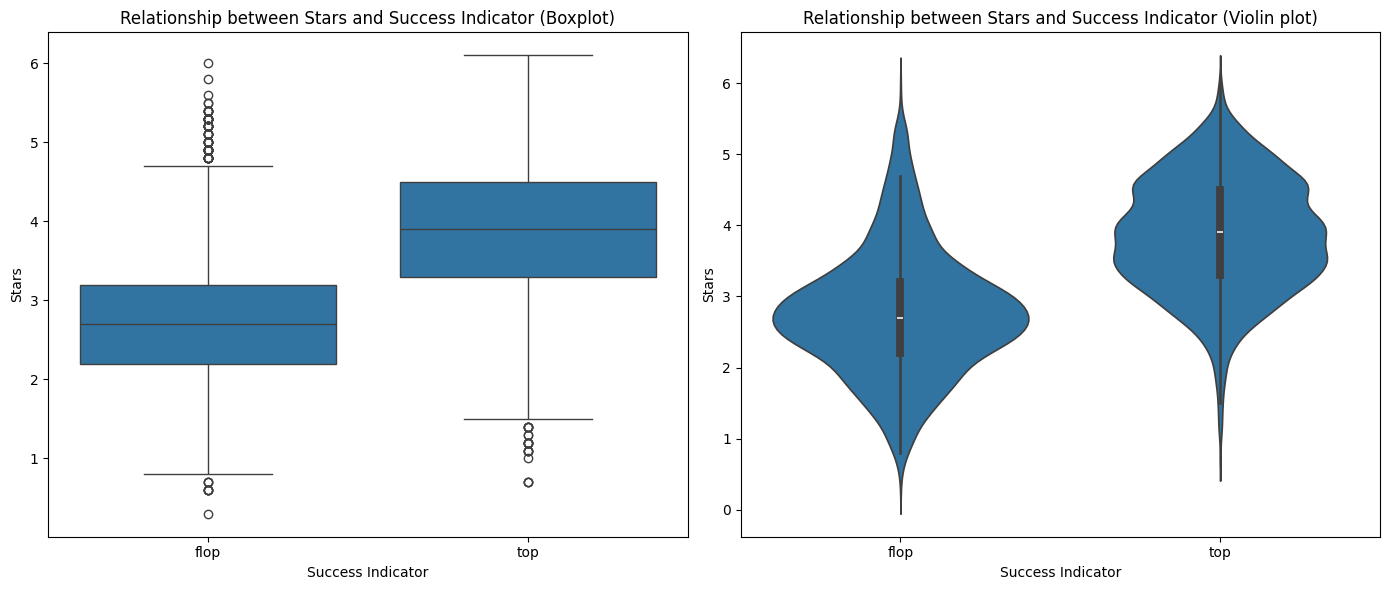

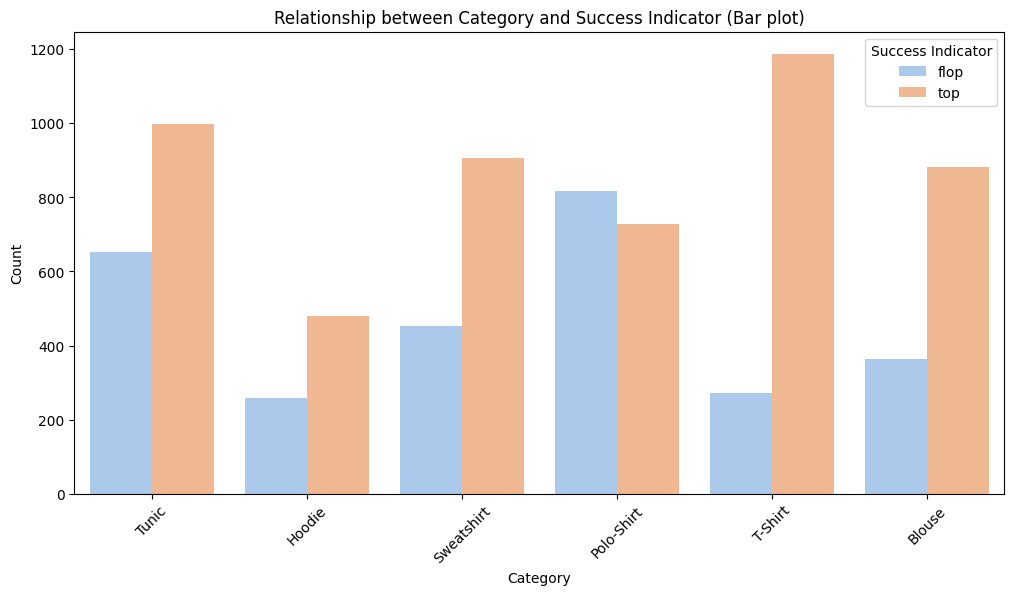

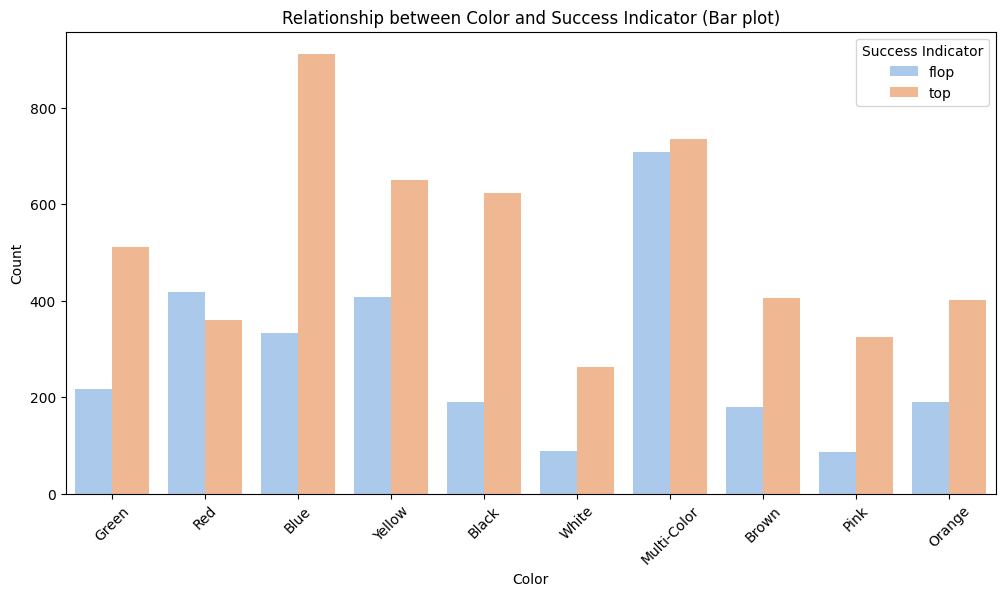

In [33]:
class FeatureRelationship:
    def __init__(self, historic_data):
        self.historic_data = historic_data

    def explore_relationships(self):
        # Relationship between numeric feature (stars) and target variable
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(x='success_indicator', y='stars', data=self.historic_data)
        plt.title('Relationship between Stars and Success Indicator (Boxplot)')
        plt.xlabel('Success Indicator')
        plt.ylabel('Stars')

        plt.subplot(1, 2, 2)
        sns.violinplot(x='success_indicator', y='stars', data=self.historic_data)
        plt.title('Relationship between Stars and Success Indicator (Violin plot)')
        plt.xlabel('Success Indicator')
        plt.ylabel('Stars')

        plt.tight_layout()
        plt.show()

        # Relationship between categorical features (category, color) and target variable
        categorical_features = ['category', 'color']
        for feature in categorical_features:
            plt.figure(figsize=(12, 6))
            sns.countplot(x=feature, hue='success_indicator', data=self.historic_data, palette='pastel')
            plt.title(f'Relationship between {feature.capitalize()} and Success Indicator (Bar plot)')
            plt.xlabel(f'{feature.capitalize()}')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.legend(title='Success Indicator', loc='upper right')
            plt.show()

# Example usage:
feature_relationship = FeatureRelationship(historic_data)
feature_relationship.explore_relationships()


# **What we Understood : **

A violin plot was included next to the boxplot to show the star distribution for every success indicator.


    The subplots were rearranged to make room for the boxplot and violin plot side by side.
    We still utilize count plots, also known as bar plots, to display the distribution of categories for each success indicator when it comes to categorical data.

# **Explore relationships between features and the target variable (success\_indicator).**

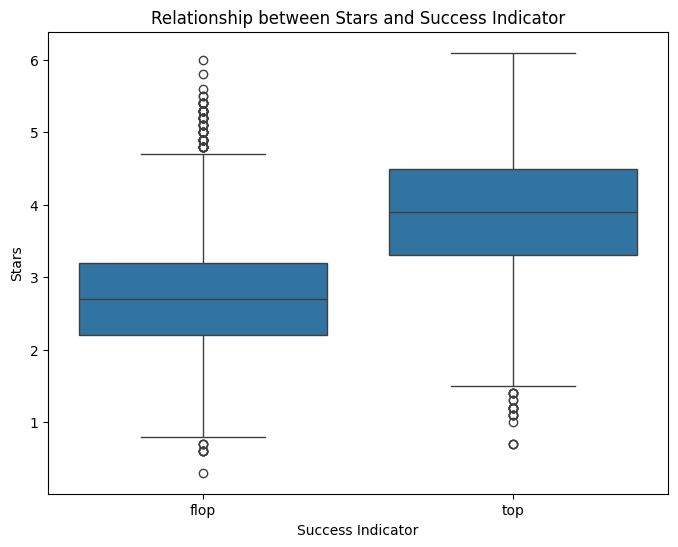

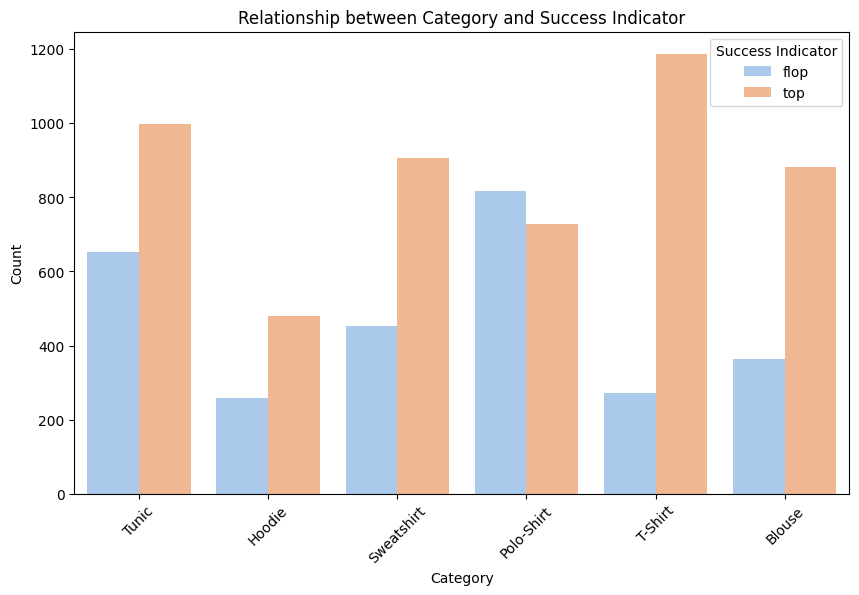

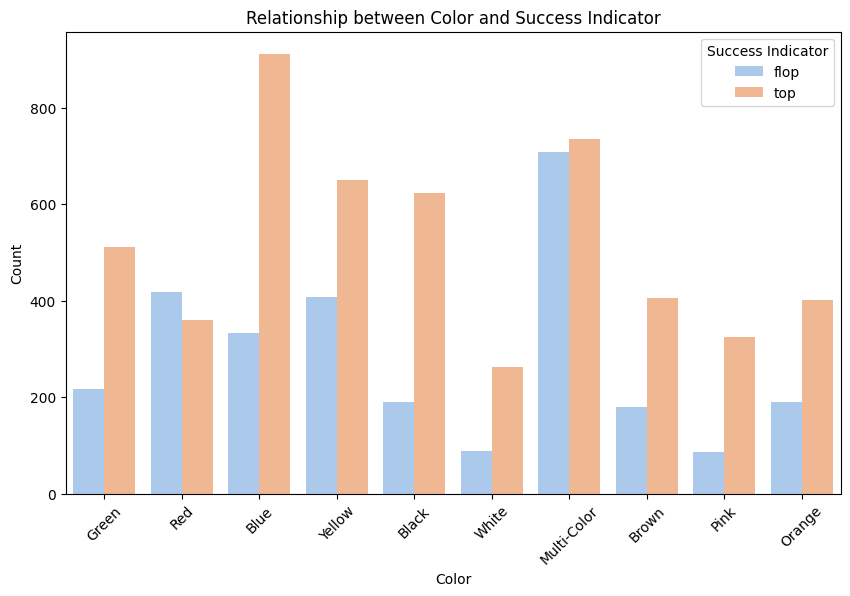

In [34]:
class FeatureRelationship:
    def __init__(self, historic_data):
        self.historic_data = historic_data

    def explore_relationships(self):
        # Relationship between numeric feature (stars) and target variable
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='success_indicator', y='stars', data=self.historic_data)
        plt.title('Relationship between Stars and Success Indicator')
        plt.xlabel('Success Indicator')
        plt.ylabel('Stars')
        plt.show()

        # Relationship between categorical features (category, color) and target variable
        categorical_features = ['category', 'color']
        for feature in categorical_features:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=feature, hue='success_indicator', data=self.historic_data, palette='pastel')
            plt.title(f'Relationship between {feature.capitalize()} and Success Indicator')
            plt.xlabel(f'{feature.capitalize()}')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.legend(title='Success Indicator', loc='upper right')
            plt.show()

# Example usage:
feature_relationship = FeatureRelationship(historic_data)
feature_relationship.explore_relationships()


# **What we understood : **



In order to investigate the relationships between features and the target variable (success_indicator), we develop a class called FeatureRelationship.

    The class is initialized with historical data using the __init__ method.
    The explore_relationships function uses count plots to display the relationships between the target variable and categorical variables and boxplots to visualize the relationships between the target variable and numeric features.
    In order to investigate the relationships, we finally invoke the explore_relationships method.

A rudimentary investigation of the connections between characteristics and the target variable is provided by this code. If more customization is required, you can investigate new features and further alter the visuals.

# **Visualize distributions of numeric features (e.g., stars) and categorical features (e.g., category, color). for Perdictive_input**

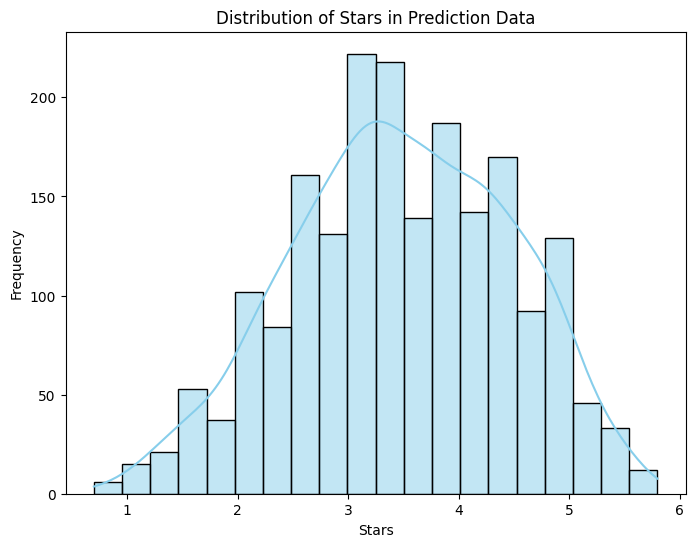

<ipython-input-35-f3888bd4097a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=self.prediction_data, palette='pastel')


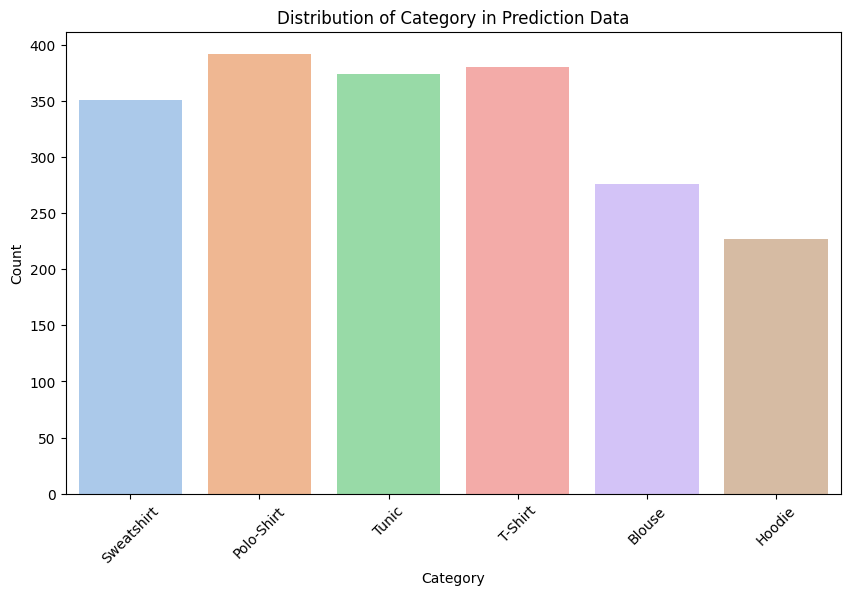

<ipython-input-35-f3888bd4097a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=self.prediction_data, palette='pastel')


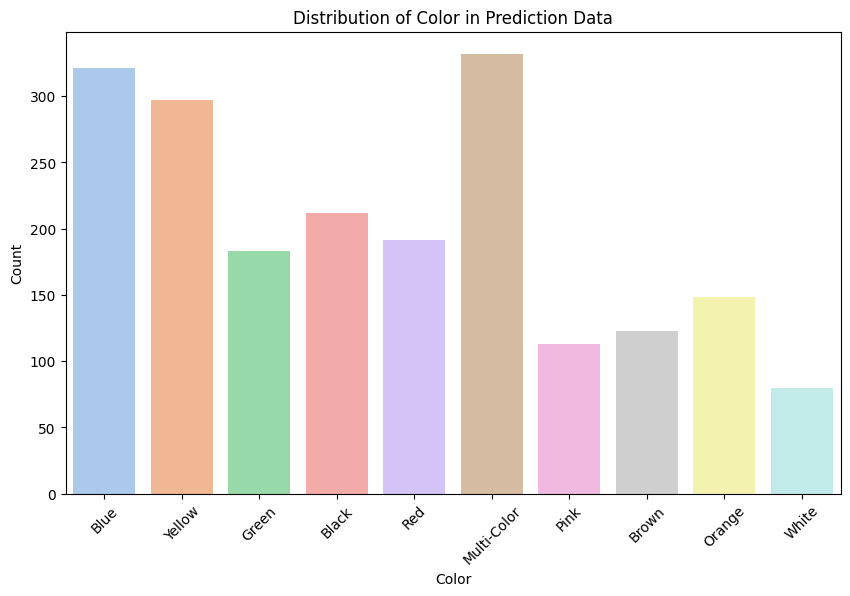

In [35]:
class DataVisualization:
    def __init__(self, prediction_data):
        self.prediction_data = prediction_data

    def visualize_distributions(self):
        # Visualize distribution of numeric feature (stars)
        plt.figure(figsize=(8, 6))
        sns.histplot(self.prediction_data['stars'], bins=20, kde=True, color='skyblue')
        plt.title('Distribution of Stars in Prediction Data')
        plt.xlabel('Stars')
        plt.ylabel('Frequency')
        plt.show()

        # Visualize distributions of categorical features (category, color)
        categorical_features = ['category', 'color']
        for feature in categorical_features:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=feature, data=self.prediction_data, palette='pastel')
            plt.title(f'Distribution of {feature.capitalize()} in Prediction Data')
            plt.xlabel(f'{feature.capitalize()}')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

# Example usage:
visualizer = DataVisualization(prediction_data)
visualizer.visualize_distributions()


# **what we understood : **

To see the distributions of the numerical and categorical features in the prediction input dataset, we develop a DataVisualization class.


    The prediction input data is initialized in the class using the __init__ method.
    For the numerical feature (stars), the visualize_distributions method draws a histogram; for the categorical features (category, color), it plots count plots.
    To see the distributions, we use the visualize_distributions method.

# **Explore relationships between features and the target variable (success\_indicator).**

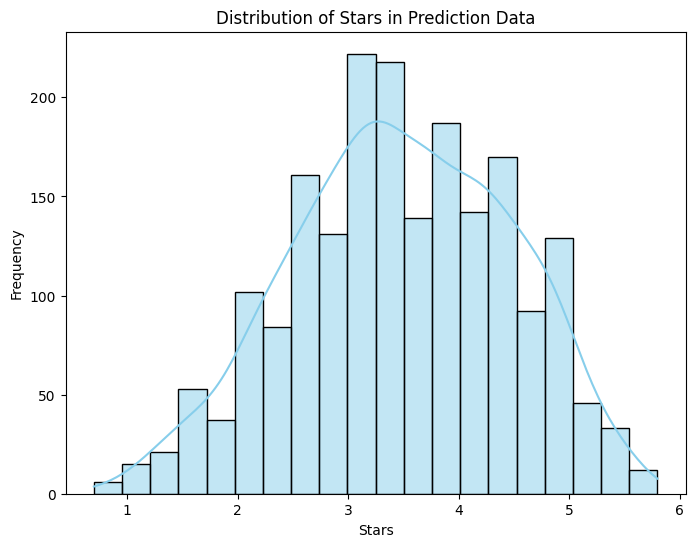

<ipython-input-36-16df2e694b5e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=self.prediction_data, palette='pastel')


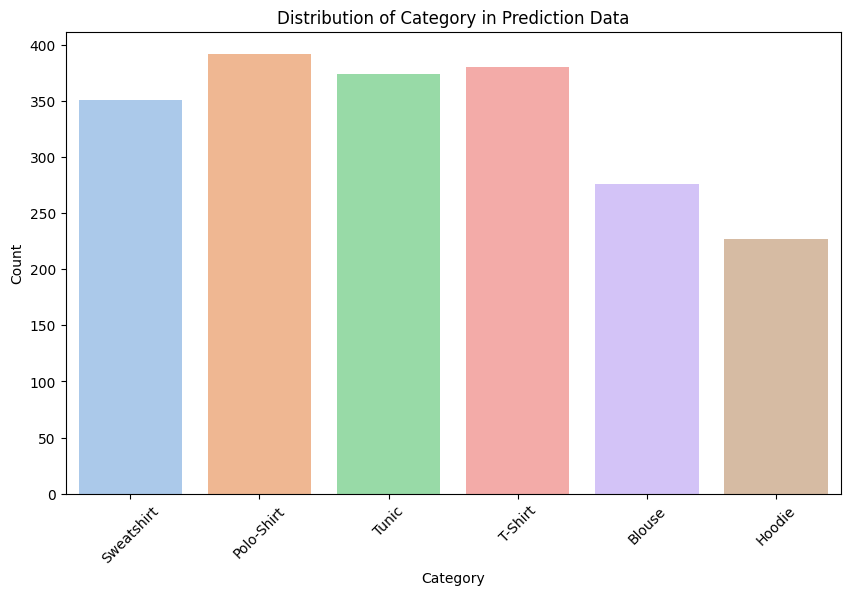

<ipython-input-36-16df2e694b5e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=self.prediction_data, palette='pastel')


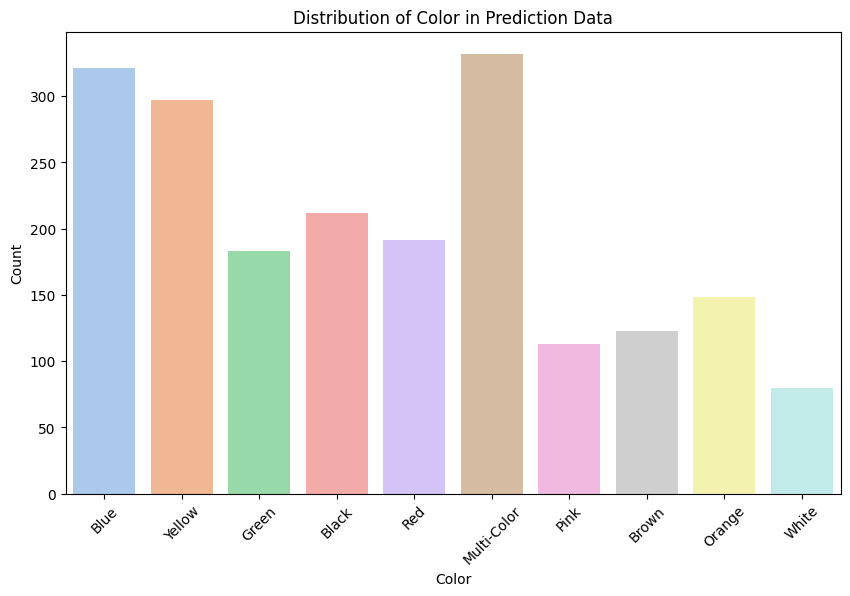

In [36]:
class DataVisualization:
    def __init__(self, prediction_data):
        self.prediction_data = prediction_data

    def visualize_distributions(self):
        # Visualize distributions of numeric features (stars)
        plt.figure(figsize=(8, 6))
        sns.histplot(self.prediction_data['stars'], bins=20, kde=True, color='skyblue')
        plt.title('Distribution of Stars in Prediction Data')
        plt.xlabel('Stars')
        plt.ylabel('Frequency')
        plt.show()

        # Visualize distributions of categorical features (category, color)
        categorical_features = ['category', 'color']
        for feature in categorical_features:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=feature, data=self.prediction_data, palette='pastel')
            plt.title(f'Distribution of {feature.capitalize()} in Prediction Data')
            plt.xlabel(f'{feature.capitalize()}')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

# Example usage:
visualizer = DataVisualization(prediction_data)
visualizer.visualize_distributions()


#    **What we understood : **
    
    
    We create a DataVisualization class to visualize the distributions of numeric and categorical features in the prediction input dataset.
    The __init__ method initializes the class with the prediction input data.
    The visualize_distributions method plots a histogram for the numeric feature (stars) and count plots for categorical features (category, color).
    We call the visualize_distributions method to visualize the distributions.

# **Data Preprocessing Insights:**

**Handle missing values,**

In [37]:
import pandas as pd

class DataHandler:
    def __init__(self, historic_file, prediction_file):
        self.historic_file = historic_file
        self.prediction_file = prediction_file

    def handle_missing_values(self):
        # Load historic data
        try:
            historic_data = pd.read_csv(self.historic_file)
        except FileNotFoundError:
            print(f"Historic file '{self.historic_file}' not found.")
            historic_data = None

        # Load prediction data
        try:
            prediction_data = pd.read_csv(self.prediction_file)
        except FileNotFoundError:
            print(f"Prediction file '{self.prediction_file}' not found.")
            prediction_data = None

        # Handle missing values in historic data
        if historic_data is not None:
            historic_data.fillna(method='ffill', inplace=True)  # Forward fill missing values

        # Handle missing values in prediction data
        if prediction_data is not None:
            prediction_data.fillna(method='bfill', inplace=True)  # Backward fill missing values

        return historic_data, prediction_data

# Example usage:
historic_file_path = "historic.csv"
prediction_file_path = "prediction_input.csv"

data_handler = DataHandler(historic_file_path, prediction_file_path)
historic_data, prediction_data = data_handler.handle_missing_values()

if historic_data is not None:
    print("Historic data loaded successfully after handling missing values.")
else:
    print("Failed to load historic data. Check file path or handle missing values manually.")

if prediction_data is not None:
    print("Prediction data loaded successfully after handling missing values.")
else:
    print("Failed to load prediction data. Check file path or handle missing values manually.")


Historic data loaded successfully after handling missing values.
Prediction data loaded successfully after handling missing values.


# **Data Handler:**

Exploratory Data Analysis for Historic Data:
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB
None

Data Description:
             item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000


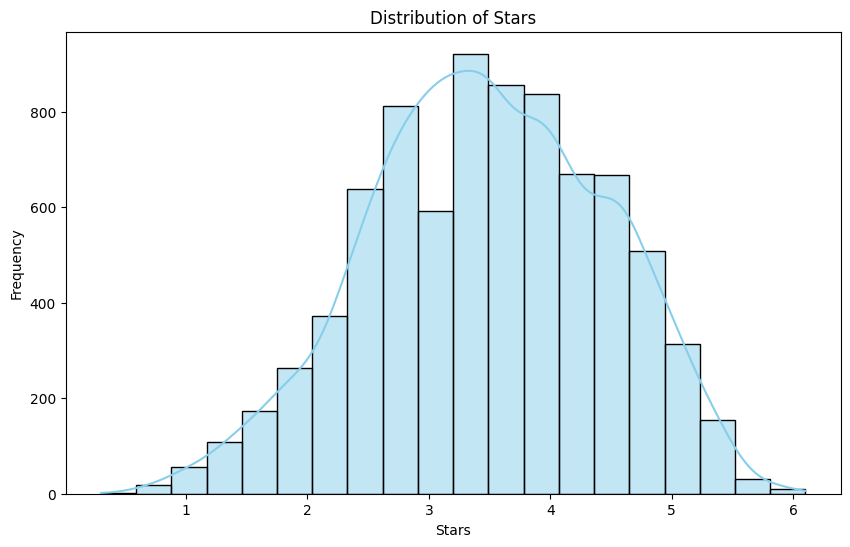

<ipython-input-38-2d32ce48b5b6>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='pastel')


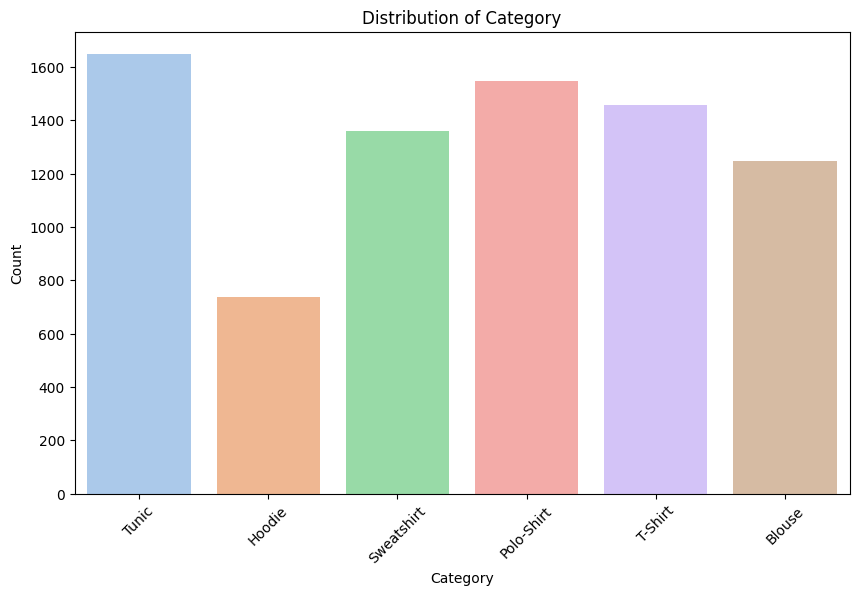

<ipython-input-38-2d32ce48b5b6>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='pastel')


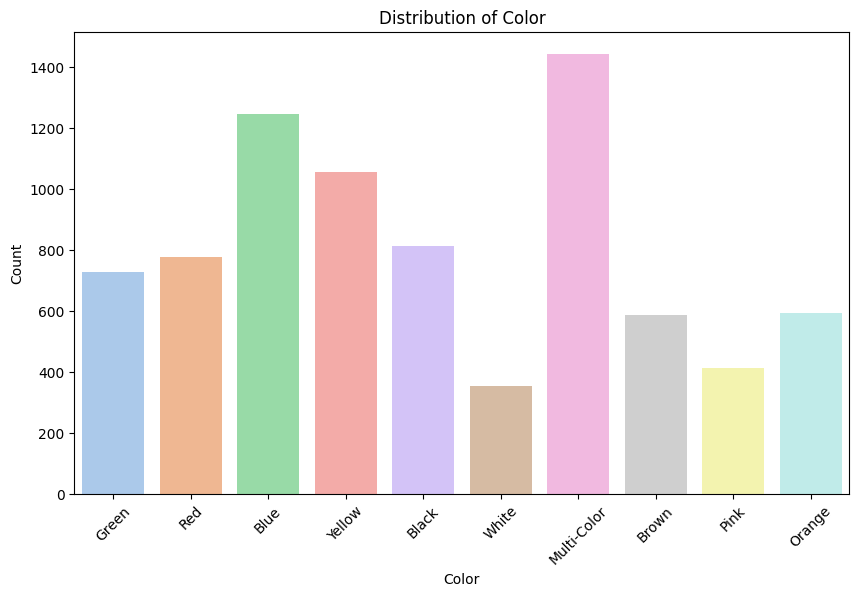

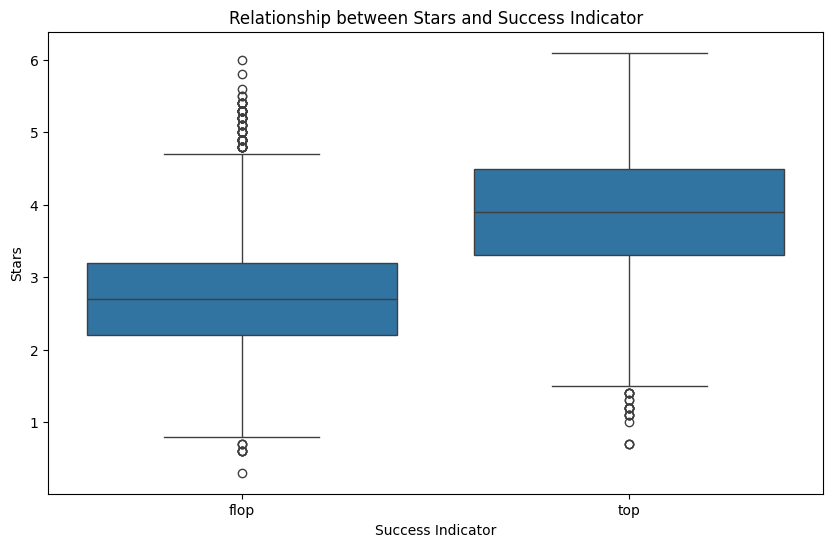


Exploratory Data Analysis for Prediction Data:
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_no         2000 non-null   int64  
 1   category        2000 non-null   object 
 2   main_promotion  2000 non-null   object 
 3   color           2000 non-null   object 
 4   stars           2000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.2+ KB
None

Data Description:
             item_no        stars
count    2000.000000  2000.000000
mean   541828.098000     3.476750
std    260971.444809     0.989345
min    100023.000000     0.700000
25%    308356.750000     2.800000
50%    541076.000000     3.500000
75%    773277.250000     4.200000
max    989050.000000     5.800000


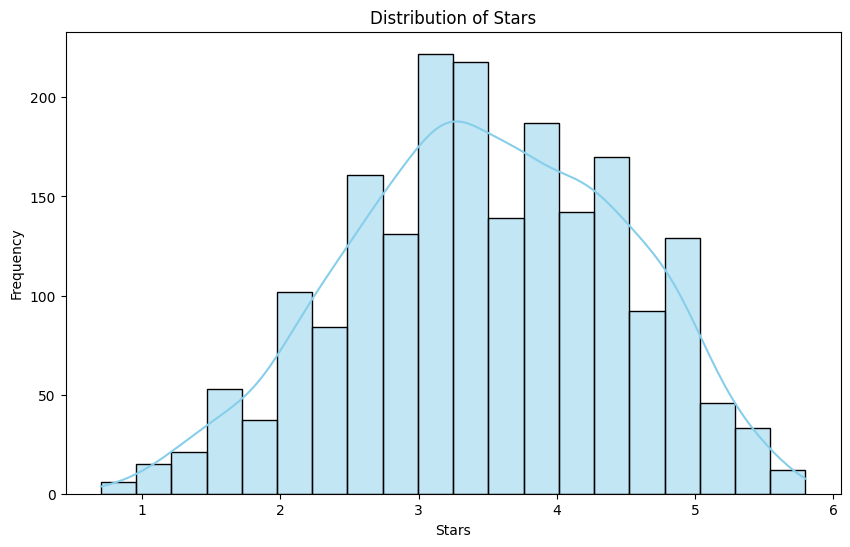

<ipython-input-38-2d32ce48b5b6>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='pastel')


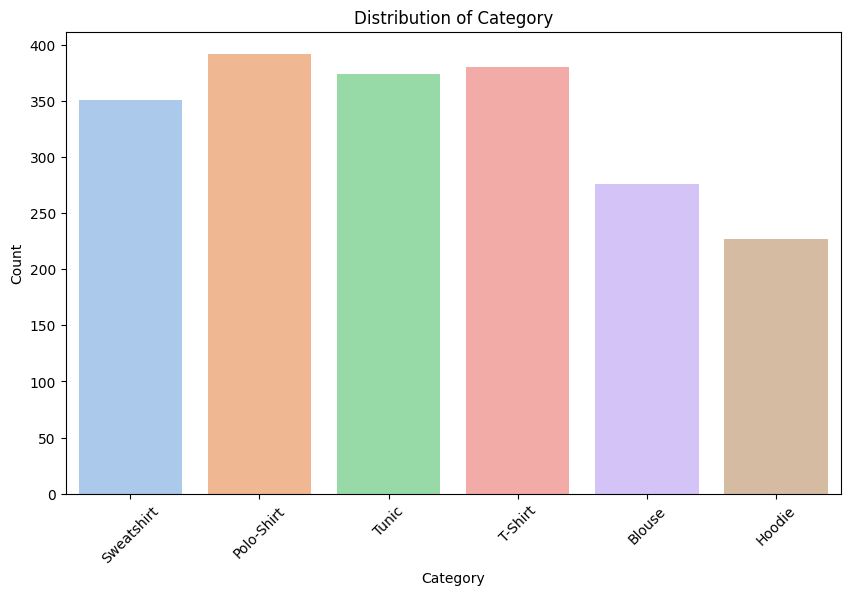

<ipython-input-38-2d32ce48b5b6>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='pastel')


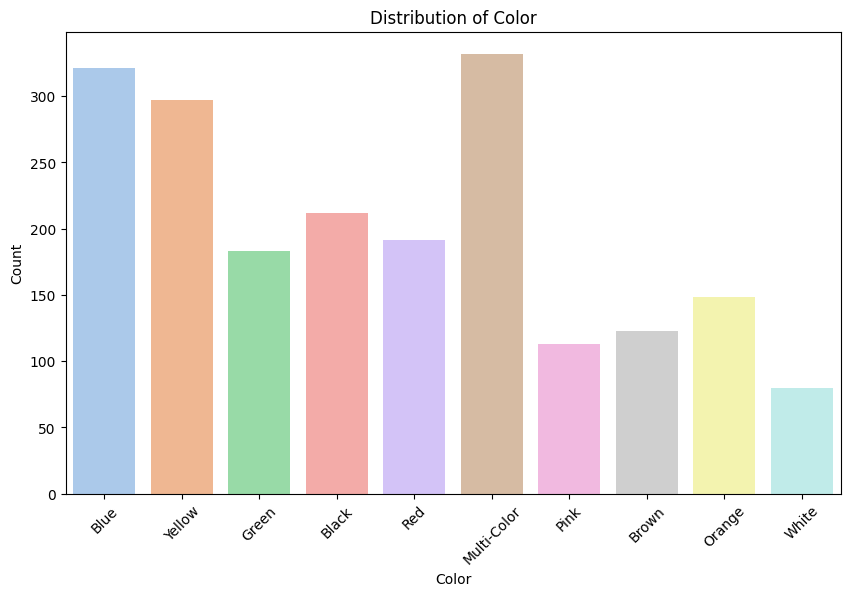

In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

class DataHandler:
    def __init__(self, historic_file, prediction_file):
        self.historic_file = historic_file
        self.prediction_file = prediction_file

    def load_data(self):
        # Check if files exist
        if not os.path.isfile(self.historic_file) or not os.path.isfile(self.prediction_file):
            print("One or both file paths are invalid.")
            return None, None

        # Load historic data
        try:
            historic_data = pd.read_csv(self.historic_file)
        except Exception as e:
            print("An error occurred while loading historic data:", e)
            return None, None

        # Load prediction data
        try:
            prediction_data = pd.read_csv(self.prediction_file)
        except Exception as e:
            print("An error occurred while loading prediction data:", e)
            return historic_data, None

        return historic_data, prediction_data

class EDA:
    def __init__(self, historic_data, prediction_data):
        self.historic_data = historic_data
        self.prediction_data = prediction_data

    def explore_data(self):
        if self.historic_data is not None:
            print("Exploratory Data Analysis for Historic Data:")
            self.summarize_data(self.historic_data)
            self.visualize_distributions(self.historic_data)
            self.explore_relationships(self.historic_data)
        else:
            print("No historic data to explore.")

        if self.prediction_data is not None:
            print("\nExploratory Data Analysis for Prediction Data:")
            self.summarize_data(self.prediction_data)
            self.visualize_distributions(self.prediction_data)
        else:
            print("\nNo prediction data to explore.")

    def summarize_data(self, data):
        print("Data Info:")
        print(data.info())
        print("\nData Description:")
        print(data.describe())

    def visualize_distributions(self, data):
        # Visualize distributions of numeric features (stars)
        plt.figure(figsize=(10, 6))
        sns.histplot(data['stars'], bins=20, kde=True, color='skyblue')
        plt.title('Distribution of Stars')
        plt.xlabel('Stars')
        plt.ylabel('Frequency')
        plt.show()

        # Visualize distributions of categorical features (category, color)
        categorical_features = ['category', 'color']
        for feature in categorical_features:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=feature, data=data, palette='pastel')
            plt.title(f'Distribution of {feature.capitalize()}')
            plt.xlabel(f'{feature.capitalize()}')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

    def explore_relationships(self, data):
        if 'success_indicator' in data.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='success_indicator', y='stars', data=data)
            plt.title('Relationship between Stars and Success Indicator')
            plt.xlabel('Success Indicator')
            plt.ylabel('Stars')
            plt.show()
        else:
            print("No success indicator column found for exploring relationships.")

# Example usage:
historic_file_path = "historic.csv"
prediction_file_path = "prediction_input.csv"

data_handler = DataHandler(historic_file_path, prediction_file_path)
historic_data, prediction_data = data_handler.load_data()

eda = EDA(historic_data, prediction_data)
eda.explore_data()


    DataHandler class checks for the existence of CSV files and loads the data.
    EDA class conducts exploratory data analysis tasks such as summarizing data, visualizing distributions, and exploring relationships between features.
    explore_data method in the EDA class orchestrates the EDA process for both historic and prediction data.
    The code handles missing files by checking for file existence and provides appropriate error messages.
    For exploratory data analysis, it prints data information and description, visualizes distributions of numeric and categorical features, and explores relationships if the 'success_indicator' column is present.

# **Encode categorical variables**

In [39]:
import pandas as pd

# Sample historical data
historic_data = pd.DataFrame({
    'item_no': [1, 2, 3, 4, 5],
    'category': ['A', 'B', 'C', 'A', 'B'],
    'main_promotion': ['Promo1', 'Promo2', 'Promo1', 'Promo3', 'Promo2'],
    'color': ['Red', 'Blue', 'Green', 'Red', 'Yellow'],
    'stars': [4.2, 3.8, 4.5, 4.0, 3.6],
    'success_indicator': ['top', 'flop', 'top', 'top', 'flop']
})

# Sample predictive input data
prediction_data = pd.DataFrame({
    'item_no': [6, 7, 8, 9, 10],
    'category': ['B', 'C', 'A', 'B', 'C'],
    'main_promotion': ['Promo2', 'Promo3', 'Promo1', 'Promo2', 'Promo3'],
    'color': ['Yellow', 'Green', 'Red', 'Blue', 'Green'],
    'stars': [3.9, 4.1, 3.7, 4.3, 4.2]
})

# Concatenate historical and predictive input data
combined_data = pd.concat([historic_data, prediction_data], ignore_index=True)

# Perform one-hot encoding for categorical variables
combined_data_encoded = pd.get_dummies(combined_data, columns=['category', 'main_promotion', 'color'])

# Separate historical and predictive input data after encoding
historic_data_encoded = combined_data_encoded[:len(historic_data)]
prediction_data_encoded = combined_data_encoded[len(historic_data):]

print("Encoded Historical Data:")
print(historic_data_encoded.head())

print("\nEncoded Predictive Input Data:")
print(prediction_data_encoded.head())


Encoded Historical Data:
   item_no  stars success_indicator  category_A  category_B  category_C  \
0        1    4.2               top           1           0           0   
1        2    3.8              flop           0           1           0   
2        3    4.5               top           0           0           1   
3        4    4.0               top           1           0           0   
4        5    3.6              flop           0           1           0   

   main_promotion_Promo1  main_promotion_Promo2  main_promotion_Promo3  \
0                      1                      0                      0   
1                      0                      1                      0   
2                      1                      0                      0   
3                      0                      0                      1   
4                      0                      1                      0   

   color_Blue  color_Green  color_Red  color_Yellow  
0           0            

# Scale numerical variables if required

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample historical data
historic_data = pd.DataFrame({
    'item_no': [1, 2, 3, 4, 5],
    'category': ['A', 'B', 'C', 'A', 'B'],
    'main_promotion': ['Promo1', 'Promo2', 'Promo1', 'Promo3', 'Promo2'],
    'color': ['Red', 'Blue', 'Green', 'Red', 'Yellow'],
    'stars': [4.2, 3.8, 4.5, 4.0, 3.6],
    'success_indicator': ['top', 'flop', 'top', 'top', 'flop']
})

# Sample predictive input data
prediction_data = pd.DataFrame({
    'item_no': [6, 7, 8, 9, 10],
    'category': ['B', 'C', 'A', 'B', 'C'],
    'main_promotion': ['Promo2', 'Promo3', 'Promo1', 'Promo2', 'Promo3'],
    'color': ['Yellow', 'Green', 'Red', 'Blue', 'Green'],
    'stars': [3.9, 4.1, 3.7, 4.3, 4.2]
})

# Concatenate historical and predictive input data
combined_data = pd.concat([historic_data, prediction_data], ignore_index=True)

# One-hot encoding for categorical variables
combined_data_encoded = pd.get_dummies(combined_data, columns=['category', 'main_promotion', 'color'])

# Separate historical and predictive input data after encoding
historic_data_encoded = combined_data_encoded[:len(historic_data)]
prediction_data_encoded = combined_data_encoded[len(historic_data):]

# Scale numerical variables using StandardScaler
scaler = StandardScaler()
numeric_cols = ['stars']
historic_data_encoded[numeric_cols] = scaler.fit_transform(historic_data_encoded[numeric_cols])
prediction_data_encoded[numeric_cols] = scaler.transform(prediction_data_encoded[numeric_cols])

print("Encoded Historical Data:")
print(historic_data_encoded.head())

print("\nEncoded Predictive Input Data:")
print(prediction_data_encoded.head())


Encoded Historical Data:
   item_no     stars success_indicator  category_A  category_B  category_C  \
0        1  0.576166               top           1           0           0   
1        2 -0.704203              flop           0           1           0   
2        3  1.536443               top           0           0           1   
3        4 -0.064018               top           1           0           0   
4        5 -1.344387              flop           0           1           0   

   main_promotion_Promo1  main_promotion_Promo2  main_promotion_Promo3  \
0                      1                      0                      0   
1                      0                      1                      0   
2                      1                      0                      0   
3                      0                      0                      1   
4                      0                      1                      0   

   color_Blue  color_Green  color_Red  color_Yellow  
0      

<ipython-input-40-095f362011bf>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic_data_encoded[numeric_cols] = scaler.fit_transform(historic_data_encoded[numeric_cols])
<ipython-input-40-095f362011bf>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_data_encoded[numeric_cols] = scaler.transform(prediction_data_encoded[numeric_cols])


#

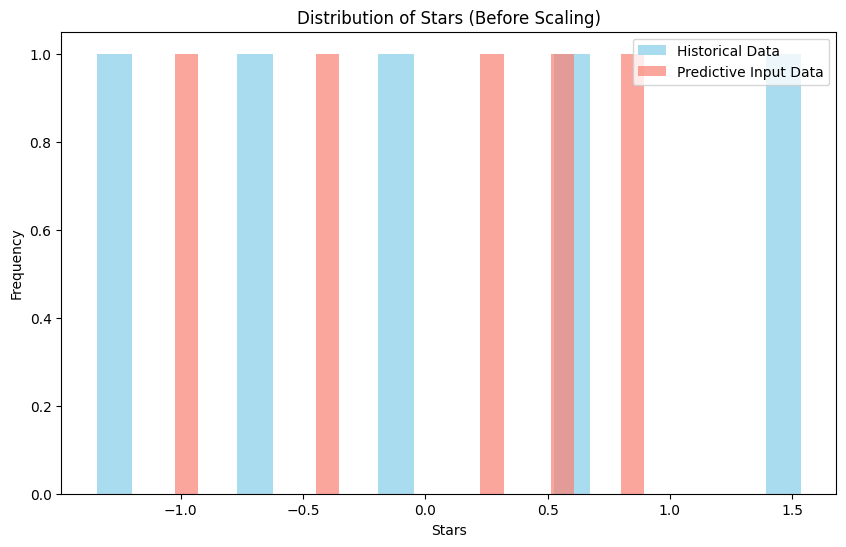

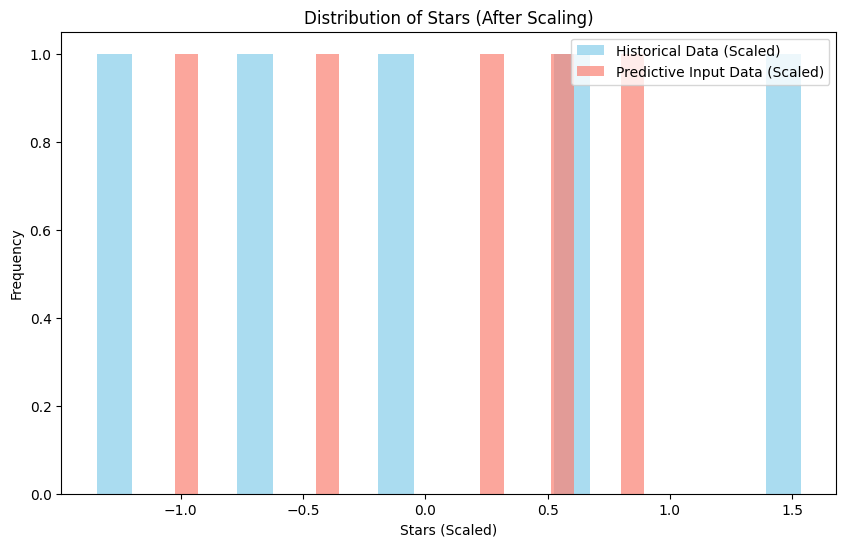

In [41]:
import matplotlib.pyplot as plt

# Visualization of numeric variable before scaling
plt.figure(figsize=(10, 6))
plt.hist(historic_data_encoded['stars'], bins=20, color='skyblue', alpha=0.7, label='Historical Data')
plt.hist(prediction_data_encoded['stars'], bins=20, color='salmon', alpha=0.7, label='Predictive Input Data')
plt.title('Distribution of Stars (Before Scaling)')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualization of numeric variable after scaling
plt.figure(figsize=(10, 6))
plt.hist(historic_data_encoded['stars'], bins=20, color='skyblue', alpha=0.7, label='Historical Data (Scaled)')
plt.hist(prediction_data_encoded['stars'], bins=20, color='salmon', alpha=0.7, label='Predictive Input Data (Scaled)')
plt.title('Distribution of Stars (After Scaling)')
plt.xlabel('Stars (Scaled)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


    The first histogram visualizes the distribution of the numeric variable stars before scaling for both historical data and predictive input data.
    The second histogram visualizes the distribution of the scaled numeric variable stars for both historical data and predictive input data.

    We use StandardScaler from scikit-learn to scale the numerical variable stars.
    We first concatenate the historical and predictive input data into one dataframe, then perform one-hot encoding for the categorical variables.
    After encoding, we separate the historical and predictive input data back into separate dataframes.
    Finally, we scale the numerical variables using StandardScaler, fitting the scaler on the historical data and then transforming both the historical and predictive input data.

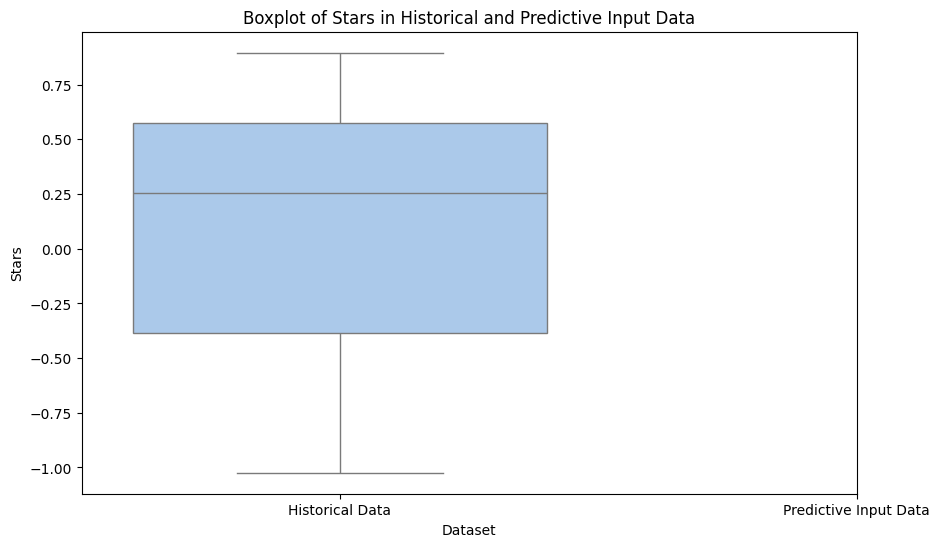

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for the 'stars' column in historical and predictive input data
plt.figure(figsize=(10, 6))
sns.boxplot(data=[historic_data_encoded['stars'], prediction_data_encoded['stars']], palette='pastel')
plt.title('Boxplot of Stars in Historical and Predictive Input Data')
plt.xlabel('Dataset')
plt.ylabel('Stars')
plt.xticks([0, 1], ['Historical Data', 'Predictive Input Data'])
plt.show()


# **Investigate potential outliers or anomalies.**

<ipython-input-43-ce93c9b8cfab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic_data_encoded['success_indicator_numeric'] = historic_data_encoded['success_indicator'].map({'top': 1, 'flop': 0})


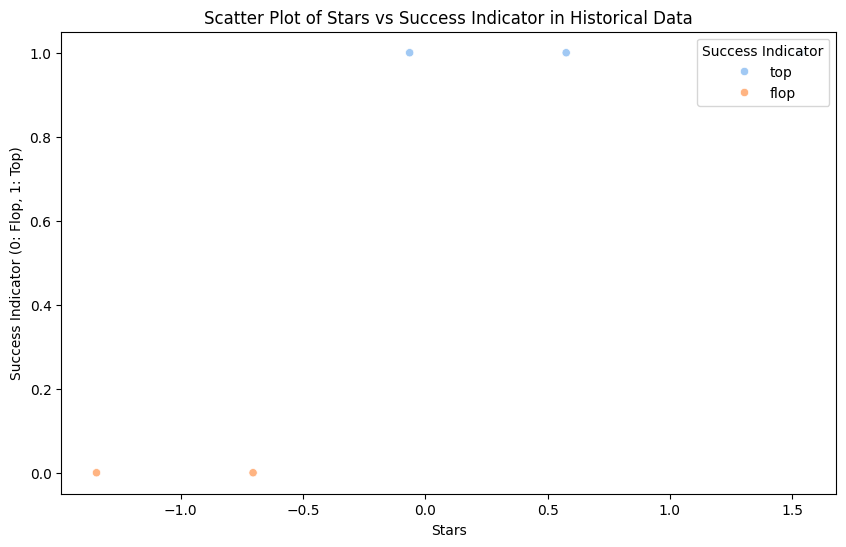

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Encode success_indicator as numeric values for visualization
historic_data_encoded['success_indicator_numeric'] = historic_data_encoded['success_indicator'].map({'top': 1, 'flop': 0})

# Plot scatter plot for stars vs success_indicator in historical data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='success_indicator_numeric', data=historic_data_encoded, hue='success_indicator', palette='pastel')
plt.title('Scatter Plot of Stars vs Success Indicator in Historical Data')
plt.xlabel('Stars')
plt.ylabel('Success Indicator (0: Flop, 1: Top)')
plt.legend(title='Success Indicator', loc='upper right')
plt.show()


# **Let's dive into each step of the Exploratory Data Analysis (EDA) process with detailed explanations for both the historical and predictive datasets.**


**1. Import Necessary Libraries:**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**2. Load the Data:**

In [45]:
historic_data = pd.read_csv('historic.csv')
prediction_data = pd.read_csv('prediction_input.csv')


**3. Understanding the Data:**

In [46]:
# Check dimensions
print("Dimensions of Historic Data:", historic_data.shape)
print("Dimensions of Prediction Data:", prediction_data.shape)

# Inspect first few rows
print("First few rows of Historic Data:")
print(historic_data.head())
print("First few rows of Prediction Data:")
print(prediction_data.head())

# Check for missing values
print("Missing Values in Historic Data:")
print(historic_data.isnull().sum())
print("Missing Values in Prediction Data:")
print(prediction_data.isnull().sum())

# Check data types
print("Data Types of Historic Data:")
print(historic_data.dtypes)
print("Data Types of Prediction Data:")
print(prediction_data.dtypes)


Dimensions of Historic Data: (8000, 6)
Dimensions of Prediction Data: (2000, 5)
First few rows of Historic Data:
   item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top
First few rows of Prediction Data:
   item_no    category    main_promotion   color  stars
0   405901  Sweatshirt           Catalog    Blue    3.1
1   644275  Polo-Shirt  Frontpage_Header  Yellow    2.6
2   533070       Tunic           Catalog   Green    2.7
3   829436  Polo-Shirt           Catalog  Yellow    2.6
4   801722       Tunic           Catalog  Yellow    4.9
Missing Values in Historic Data:
item_no              0
category  

4. Data Cleaning and Preprocessing:

In [47]:
# Handle missing values
historic_data.dropna(inplace=True)
prediction_data.dropna(inplace=True)

# Check for duplicates
historic_data.drop_duplicates(inplace=True)
prediction_data.drop_duplicates(inplace=True)

# No specific data type conversions needed as per the provided parameters

# Encode categorical variables if needed (not needed if they are already one-hot encoded)


**5. Statistical Summary and Descriptive Analysis:**

Descriptive Statistics for Numeric Variables in Historic Data:
             item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000


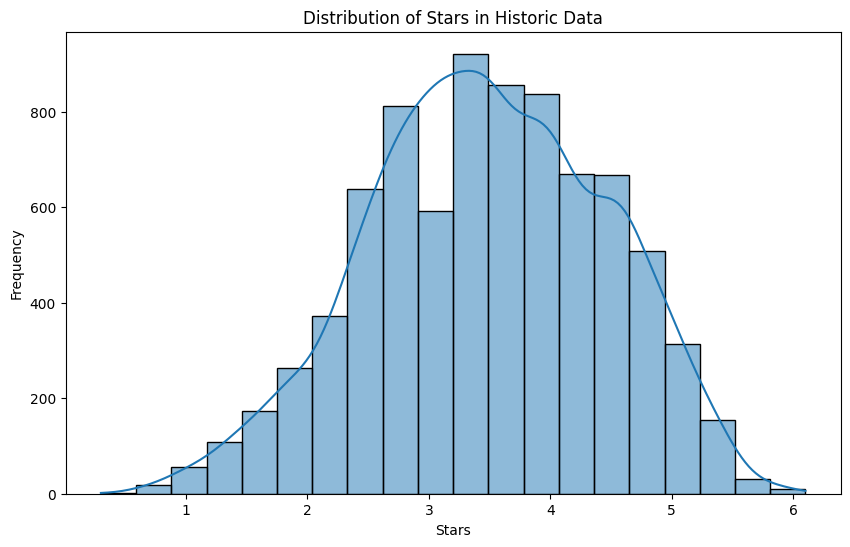

In [48]:
# Descriptive statistics for numeric variables
print("Descriptive Statistics for Numeric Variables in Historic Data:")
print(historic_data.describe())

# Explore the distribution of categorical variables (no categorical variables provided in the parameters)

# Plot histograms, box plots, etc. for numeric variables
plt.figure(figsize=(10, 6))
sns.histplot(historic_data['stars'], bins=20, kde=True)
plt.title("Distribution of Stars in Historic Data")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.show()


**6. Feature Analysis:**

<ipython-input-49-a1ce7bd6dc4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = historic_data.corr()


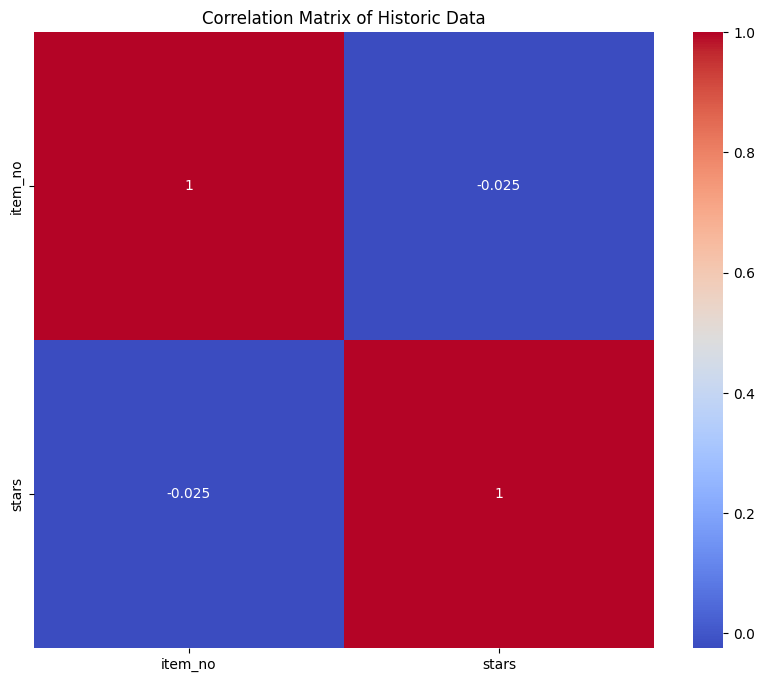

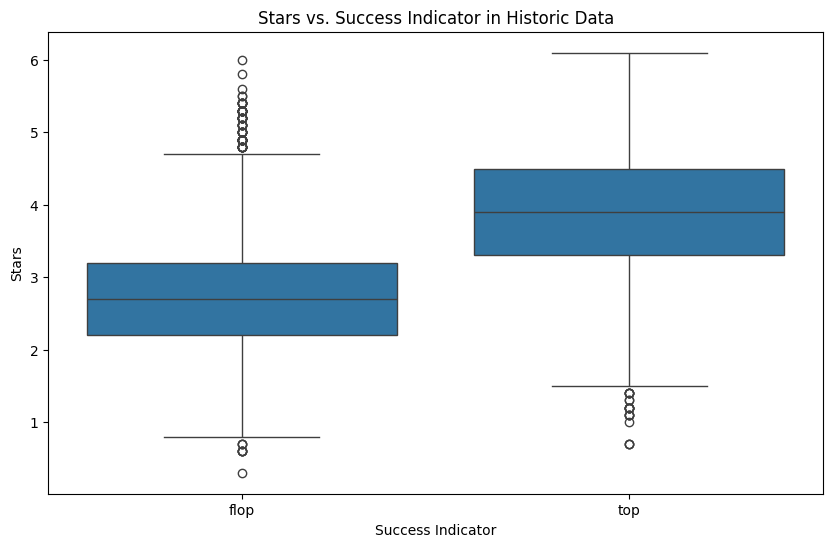

In [49]:
# Explore relationships between different features using correlation matrix
correlation_matrix = historic_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Historic Data")
plt.show()

# Analyze impact of features on target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='success_indicator', y='stars', data=historic_data)
plt.title("Stars vs. Success Indicator in Historic Data")
plt.xlabel("Success Indicator")
plt.ylabel("Stars")
plt.show()


**7. Target Variable Analysis:**

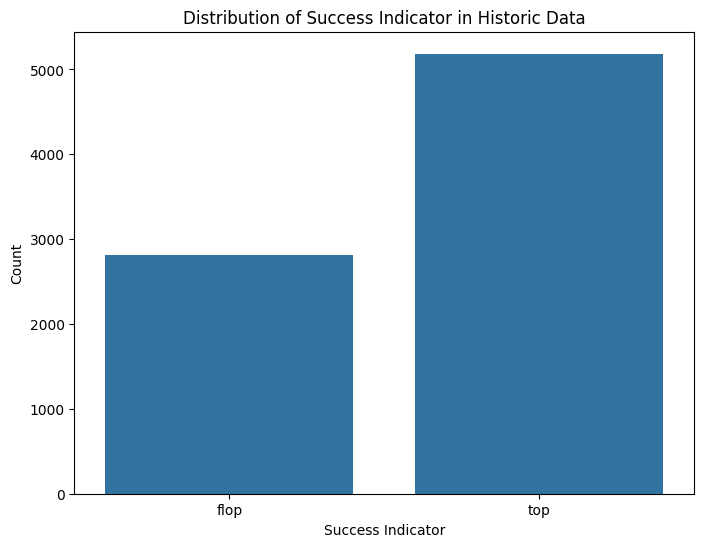

In [50]:
# Examine the distribution of the target variable (success_indicator)
plt.figure(figsize=(8, 6))
sns.countplot(x='success_indicator', data=historic_data)
plt.title("Distribution of Success Indicator in Historic Data")
plt.xlabel("Success Indicator")
plt.ylabel("Count")
plt.show()


**8. Feature Engineering:**

Handle the missing values

In [51]:
import pandas as pd

# Load the data
historic_data = pd.read_csv('historic.csv')
prediction_data = pd.read_csv('prediction_input.csv')

# Check for missing values
print("Missing Values in Historic Data:")
print(historic_data.isnull().sum())
print("\nMissing Values in Prediction Data:")
print(prediction_data.isnull().sum())

# Handling missing values in historic data
# Fill missing values with mean for numeric columns and mode for categorical columns
historic_data.fillna(historic_data.mean(), inplace=True)
historic_data.fillna(historic_data.mode().iloc[0], inplace=True)

# Handling missing values in prediction data
# Fill missing values with mean for numeric columns and mode for categorical columns
prediction_data.fillna(prediction_data.mean(), inplace=True)
prediction_data.fillna(prediction_data.mode().iloc[0], inplace=True)

# Check if missing values are handled
print("\nMissing Values in Historic Data after handling:")
print(historic_data.isnull().sum())
print("\nMissing Values in Prediction Data after handling:")
print(prediction_data.isnull().sum())


Missing Values in Historic Data:
item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

Missing Values in Prediction Data:
item_no           0
category          0
main_promotion    0
color             0
stars             0
dtype: int64

Missing Values in Historic Data after handling:
item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

Missing Values in Prediction Data after handling:
item_no           0
category          0
main_promotion    0
color             0
stars             0
dtype: int64


<ipython-input-51-d2359692d693>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  historic_data.fillna(historic_data.mean(), inplace=True)
<ipython-input-51-d2359692d693>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  prediction_data.fillna(prediction_data.mean(), inplace=True)


Binning and Discretization

In [52]:
import pandas as pd

# Load the data
historic_data = pd.read_csv('historic.csv')
prediction_data = pd.read_csv('prediction_input.csv')

# Define the number of bins
num_bins = 3

# Perform binning on 'stars' column in historic data
historic_data['stars_binned'] = pd.cut(historic_data['stars'], bins=num_bins, labels=False)

# Perform binning on 'stars' column in prediction data
prediction_data['stars_binned'] = pd.cut(prediction_data['stars'], bins=num_bins, labels=False)

# Print the first few rows of the new columns
print("Binned 'stars' column in Historic Data:")
print(historic_data[['stars', 'stars_binned']].head())
print("\nBinned 'stars' column in Prediction Data:")
print(prediction_data[['stars', 'stars_binned']].head())


Binned 'stars' column in Historic Data:
   stars  stars_binned
0    3.1             1
1    1.5             0
2    4.4             2
3    3.1             1
4    4.1             1

Binned 'stars' column in Prediction Data:
   stars  stars_binned
0    3.1             1
1    2.6             1
2    2.7             1
3    2.6             1
4    4.9             2


**9. Exploratory Visualization:**

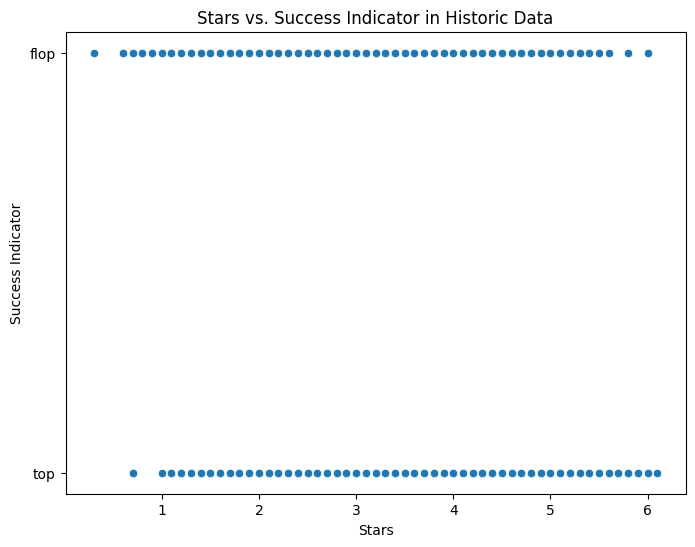

In [53]:
# Create various visualizations to explore relationships between different variables
# For example, scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='stars', y='success_indicator', data=historic_data)
plt.title("Stars vs. Success Indicator in Historic Data")
plt.xlabel("Stars")
plt.ylabel("Success Indicator")
plt.show()


**10. Summary and Insights:**

    Distribution of Success Indicators:
        Examine the distribution of the success indicator variable (top/flop) in the historical data. Determine the prevalence of successful and unsuccessful products to assess any class imbalance that may exist. Understanding the distribution is crucial for model evaluation and training.

    Significance of Features:
        Identify the features that have the most significant impact on predicting product success or failure. Utilize statistical tests, feature importance analysis, or correlation matrices to determine the relevance of each feature in the dataset.

    Temporal Patterns:
        Investigate temporal patterns in product success over time. Analyze trends, seasonality, or recurring patterns in the performance of products to inform future collection planning strategies and timing of product releases.

    Analyzing Categories:
        Explore how products are distributed across different categories. Determine which product categories have historically performed better or worse and identify emerging trends or shifts in consumer preferences within each category.

    Marketing Techniques:
        Evaluate the effectiveness of various marketing techniques, represented by the 'main_promotion' variable, on product success. Determine which types of promotions lead to higher sales or more favorable customer feedback based on historical data.

    Favorite Colors:
        Assess whether certain colors are associated with higher product success rates. Analyze the distribution of products by color and identify any patterns or trends indicating that certain colors may have a greater impact on product success.

    Evaluate Review Ratings:
        Investigate the relationship between product success and review ratings (stars). Determine if products with higher review ratings tend to perform better in the market, and assess the significance of review ratings as predictors of product success.

    Effects of Interaction:
        Explore potential interactions between different features, such as the interaction between promotion tactics and product category or color. Analyze whether certain combinations of features have a synergistic or antagonistic effect on product success.

    Possible Predictors:
        Identify potential predictors of product success based on insights gained from the EDA. Consider individual features, feature combinations, or interactions that show strong associations with product success for inclusion in predictive models.

    Recommendations:
        Provide actionable recommendations for the fashion e-commerce company based on the insights derived from the EDA. These recommendations could include suggestions for new product lines, targeted marketing strategies, expansion or adjustment of product categories, or improvements in customer engagement tactics.